# Loyd's hell maze

You're standing in the middle of a number maze, in the marked area 3. 

You can move in all 8 directions. The length of the step is determined by the value of the square you are standing on.

You exit the maze if you end just one step beyond the maze boundary.

Although the task is very simple, finding one of the two possible paths is very challenging for humans.

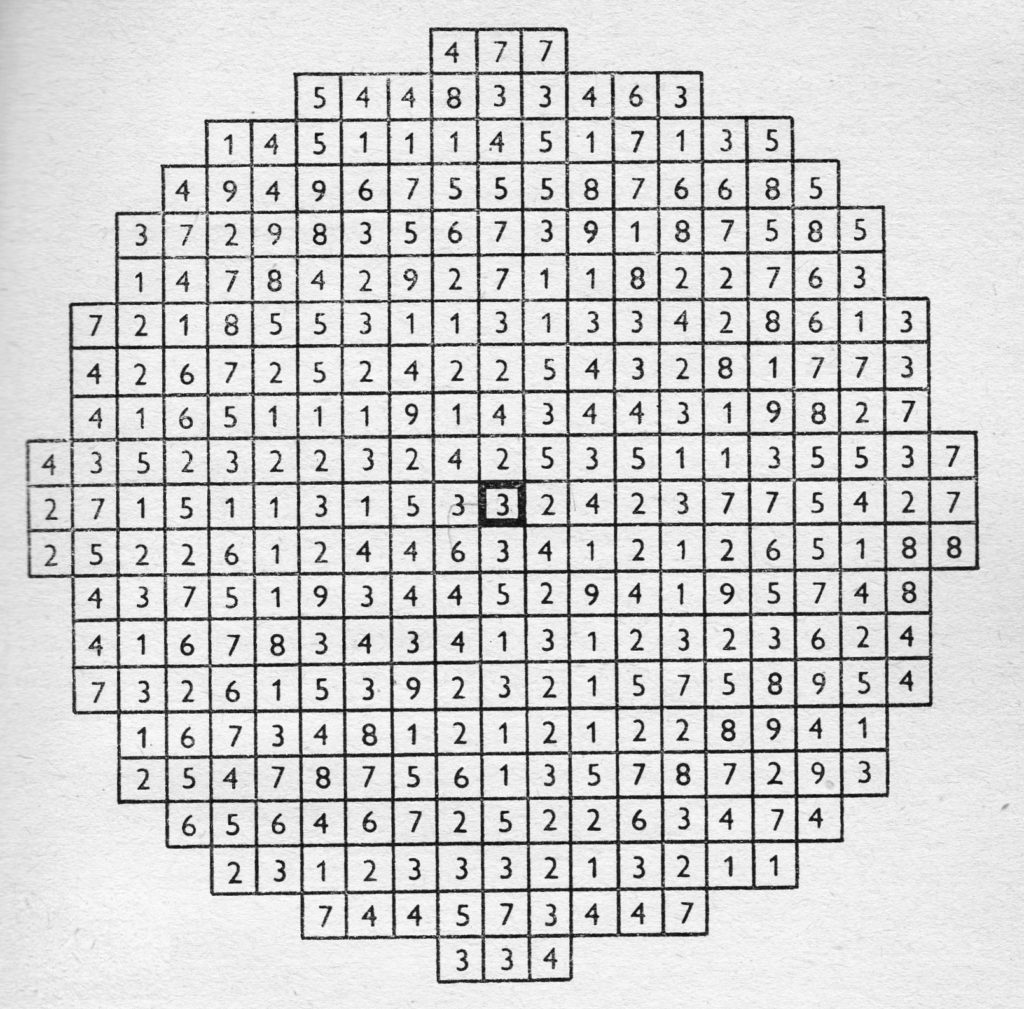

In [1]:
import numpy as np

Reading a maze file into an array of numbers

In [ ]:

f = open("../dataset/loyd.txt", "r")
line=f.read()
f.close()
cells = line.split (',')
numbers = [int(i) for i in cells]

Conversion to 2D numpy array

In [ ]:
gameplan = np.array(numbers)
gameplan.resize(23, 23)

The value 0 is at the point where the maze is to be exited. A value of -1 indicates a value outside the maze.

In [ ]:
print (gameplan)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  0  0  0  0  4  7  7  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  0  0  0  5  4  4  8  3  3  4  6  3  0  0  0 -1 -1 -1 -1]
 [-1 -1 -1  0  0  1  4  5  1  1  1  4  5  1  7  1  3  5  0  0 -1 -1 -1]
 [-1 -1  0  0  4  9  4  9  6  7  5  5  5  8  7  6  6  8  5  0  0 -1 -1]
 [-1 -1  0  3  7  2  9  8  3  5  6  7  3  9  1  8  7  5  8  5  0  0 -1]
 [-1  0  0  1  4  7  8  4  2  9  2  7  1  1  8  2  2  7  6  3  0  0 -1]
 [-1  0  7  2  1  8  5  5  3  1  1  3  1  3  3  4  2  8  6  1  3  0 -1]
 [-1  0  4  2  6  7  2  5  2  4  2  2  5  4  3  2  8  1  7  7  3  0 -1]
 [ 0  0  4  1  6  5  1  1  1  9  1  4  3  4  4  3  1  9  8  2  7  0  0]
 [ 0  4  3  5  2  3  2  2  3  2  4  2  5  3  5  1  1  3  5  5  3  7  0]
 [ 0  2  7  1  5  1  1  3  1  5  3  3  2  4  2  3  7  7  5  4  2  7  0]
 [ 0  2  5  2  2  6  1  2  4  4  6  3  4  1  2  1  2  6  5  1  8  8  0]
 [ 0  0  4  3  7  5  1  9  3  4  4  5  2  9  4  1  9  5  7  4  8

# Task

Solve the maze using breadth-first, depth-first and iterative searches with an expected solution depth of 5 to 10.
- You have completed the state class from the previous exercise

- Complete the DLS search method
- Solve the problem with different searches

You need to complete the code in the places marked **# !!! todo**

In [ ]:
class State:
    generated = 0
    
    def __init__(self, row, column):
        # !!! todo
        pass
        
    def expand(self, action):
        # !!! todo
        pass
        
    def __eq__(self, other):        
        # !!! todo
        pass

In [ ]:
class Node:
    """
        Node for searching
        
        parent - reference to the parent node
        state - object State
        action - the action that led to this node
        depth - tree depth
    """

    def __init__(self, parent=None, state=None, action=None, depth=0):
        self.parent = parent
        self.state = state
        self.action = action
        self.depth = depth

    def __eq__(self, other):
        return self.state == other.state
    
    def succesors(self, actions):
        succesors = []
        for action in actions:
            new_state = self.state.expand(action)
            if new_state is not None:
                succesors.append(Node(parent=self,
                                      state=new_state,
                                      action=action,
                                      depth=self.depth + 1))
        return succesors

    def path(self):
        actions = []
        node=self
        while node.action is not None:
            actions.append(f"{node.action}")
            node = node.parent
        actions.reverse()
        return actions

In [ ]:
class Problem:
    """
        Main class        
        fringe - a list of nodes to scan, initially populated with the initial state        
        actions - list of possible actions        
    """

    def __init__(self, initial_state, actions):
        self.fringe = []
        self.fringe.append(Node(parent=None, state=initial_state, action=None, depth=0))        
        self.actions = actions 
        global generated
        generated=0

    def goal_test(self, state):
        if state.cell_value() == 0:
            return True
        else:
            return False

    def select_from(self, fringe, strategy, max_depth=5):
        if strategy=="BFS":
            return fringe.pop(0)
        elif strategy=="DFS":
            return fringe.pop(-1)
        elif strategy=="DLS":            
            # !!! todo
            return None
        else:            
            return fringe.pop(0)
            

    def tree_search(self, strategy):
        while True:
            if len(self.fringe) == 0:
                return None
                        
            node = self.select_from(self.fringe, strategy)

            if node is None: 
                return None
            
            if self.goal_test(node.state):
                return node
            
            self.fringe.extend(node.succesors(self.actions))

    def graph_search(self, strategy, max_depth=5):
        explored = []
        while True:
            if len(self.fringe) == 0:
                return None
            
            node = self.select_from(self.fringe, strategy, max_depth)

            if node is None: 
                return None
            
            if self.goal_test(node.state):
                return node
            
            explored.append(node)
            
            succesors = node.succesors(self.actions)

            for succesor in succesors:
                if (succesor not in explored) and (succesor not in self.fringe):
                    self.fringe.append(succesor)

# BFS

In [ ]:
problem = Problem(initial_state=State(row=11, column=11),
                actions=['u', 'ur', 'r', 'dr', 'd', 'dl', 'l', 'ul'],
                )

State.generated = 0
solution = problem.graph_search(strategy='BFS')

if solution is not None:
    print (f"Number of states searched is {State.generated}.")
    print (solution.path())
else:
    print ("The problem has no solution.")  

# DFS

In [ ]:
# definice problému
problem = Problem(initial_state=State(row=11, column=11),
                actions=['u', 'ur', 'r', 'dr', 'd', 'dl', 'l', 'ul'],
                )

State.generated = 0
solution = problem.graph_search(strategy='DFS')

if solution is not None:
    print (f"Number of states searched is {State.generated}.")
    print (solution.path())
else:
    print ("The problem has no solution.")  

# Iterative search

In [ ]:
for depth in range (5, 10):
    print (f"Max depth: {depth}")

    problem = Problem(initial_state=State(row=11, column=11),
                actions=['u', 'ur', 'r', 'dr', 'd', 'dl', 'l', 'ul'],                                
                )   
    State.generated = 0
    solution = problem.graph_search(strategy='DLS', max_depth=depth)

    if solution is not None:
        print (f"Number of states searched is {State.generated}.")
        print (solution.path())
    else:
        print ("The problem has no solution.")  